In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

sns.set(rc = {"figure.figsize":(16, 9)})

In [2]:
solution30_900 = np.loadtxt( "build/nzf_sol30_900.txt")
solution5_25   = np.loadtxt( "build/nzf_sol5_25.txt")

In [3]:
t        = solution5_25[:, 0]
x        = solution5_25[:, 1]
y        = solution5_25[:, 2]
num_ans  = solution5_25[:, 3]
anal_ans = solution5_25[:, 4]

In [4]:
t        = solution30_900[:, 0]
x        = solution30_900[:, 1]
y        = solution30_900[:, 2]
num_ans  = solution30_900[:, 3]
anal_ans = solution30_900[:, 4]

/tmp/ipykernel_45531/3988425707.py:17: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(d_x, d_y, num_ans[(i - 1) * 841:i * 841].reshape((29, 29)), cmap='viridis', label="Численное решение"),


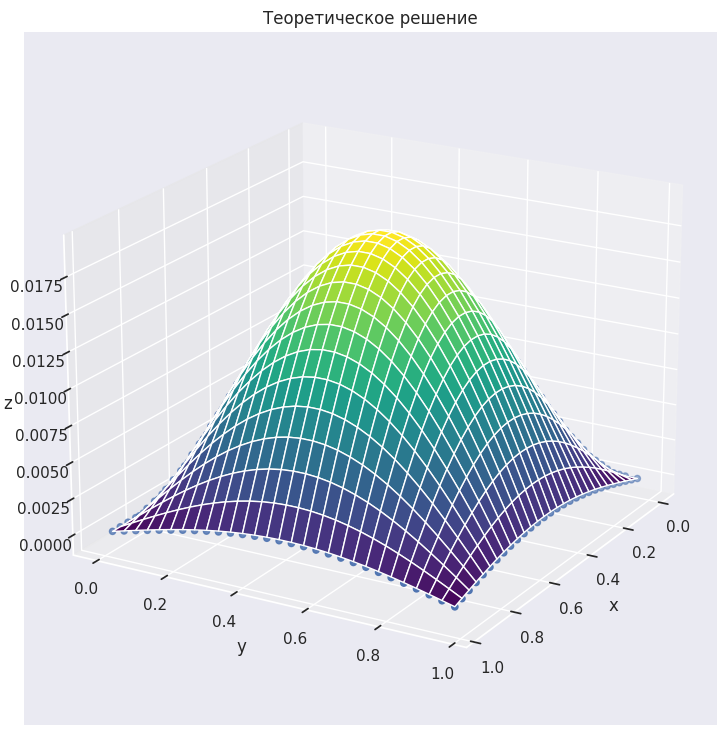

<Figure size 1600x900 with 0 Axes>

In [5]:
i = 50

i_t        = t       [(i - 1) * 841:i * 841]  
i_x        = x       [(i - 1) * 841:i * 841]  
i_y        = y       [(i - 1) * 841:i * 841]  
i_num_ans  = num_ans [(i - 1) * 841:i * 841]  
i_anal_ans = anal_ans[(i - 1) * 841:i * 841]  


d_x, d_y = i_y[:int(np.sqrt(len(i_num_ans)))], i_y[:int(np.sqrt(len(i_num_ans)))]
d_x, d_y = np.meshgrid(d_x, d_y)
d_num_ans = i_num_ans.reshape((int(np.sqrt(len(i_num_ans))), int(np.sqrt(len(i_num_ans)))))
# Строим поверхность
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.plot_surface(d_x, d_y, anal_ans[(i - 1) * 841:i * 841].reshape((29, 29)), cmap='viridis', label="Аналитическое решение")
ax.scatter(d_x, d_y, num_ans[(i - 1) * 841:i * 841].reshape((29, 29)), cmap='viridis', label="Численное решение"),

# Настройки осей и меток
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_title("Теоретическое решение")
ax.view_init(20, 30)
# Отображаем график
plt.show()
plt.savefig("TeorSolPict.pdf")

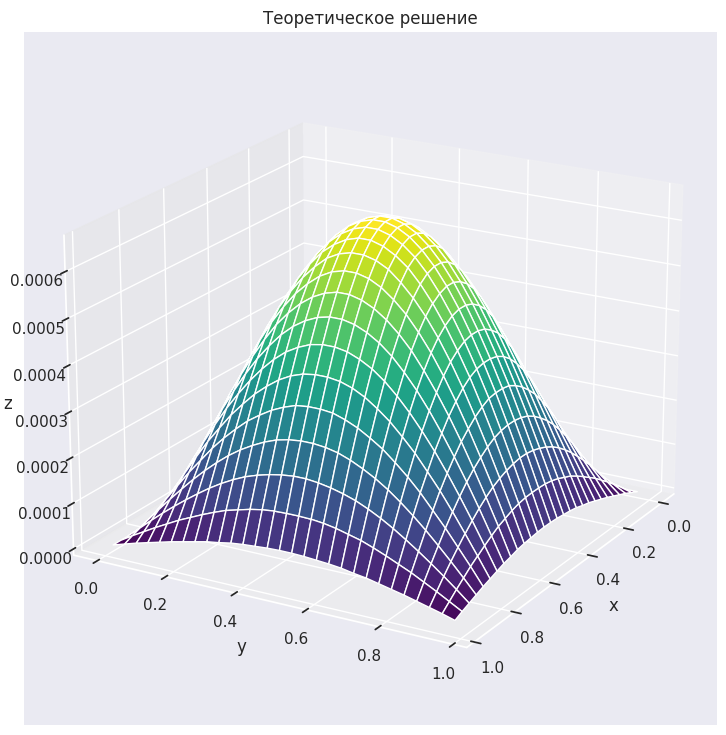

<Figure size 1600x900 with 0 Axes>

In [6]:
i = 50

i_t        = t       [(i - 1) * 841:i * 841]  
i_x        = x       [(i - 1) * 841:i * 841]  
i_y        = y       [(i - 1) * 841:i * 841]  
i_num_ans  = num_ans [(i - 1) * 841:i * 841]  
i_anal_ans = anal_ans[(i - 1) * 841:i * 841]  


d_x, d_y = i_y[:int(np.sqrt(len(i_num_ans)))], i_y[:int(np.sqrt(len(i_num_ans)))]
d_x, d_y = np.meshgrid(d_x, d_y)
d_num_ans = i_num_ans.reshape((int(np.sqrt(len(i_num_ans))), int(np.sqrt(len(i_num_ans)))))
# Строим поверхность
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.plot_surface(d_x, d_y, anal_ans[(i - 1) * 841:i * 841].reshape((29, 29)) - num_ans[(i - 1) * 841:i * 841].reshape((29, 29)), cmap='viridis', label="Аналитическое решение")

# Настройки осей и меток
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_title("Теоретическое решение")
ax.view_init(20, 30)
# Отображаем график
plt.show()
plt.savefig("TeorSolPict.pdf")

In [6]:
from matplotlib import cm
from tqdm import tqdm
from matplotlib.animation import ArtistAnimation

sns.set_theme(style="darkgrid")

def create_gif_solution(interval):

    fig = plt.figure()
    plt.figure(figsize=(10, 10))

    ax = fig.add_subplot(projection="3d")
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('u')

    x, y = i_y[:29], i_y[:29]
    d_x, d_y = np.meshgrid(x, y)
    frames = []
    for i in tqdm(range(1, 900)):
        frames.append([ax.plot_surface(d_x, d_y, anal_ans[(i - 1) * 841:i * 841].reshape((29, 29)), cmap='viridis', label="Аналитическое решение"),
                       ax.scatter(d_x, d_y, num_ans[(i - 1) * 841:i * 841].reshape((29, 29)), cmap='viridis', color="red")])
        
    animation = ArtistAnimation(
    fig,                # фигура, где отображается анимация
    frames,              # кадры
    interval=interval,        # задержка между кадрами в мс
    blit=True,          # использовать ли двойную буферизацию
    repeat=True)       # зацикливать ли анимацию
    animation.save('numeric_vs_analitical.gif')

  0%|          | 0/899 [00:00<?, ?it/s]/tmp/ipykernel_49051/3451788352.py:22: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(d_x, d_y, num_ans[(i - 1) * 841:i * 841].reshape((29, 29)), cmap='viridis', color="red")])
100%|██████████| 899/899 [00:03<00:00, 232.55it/s]
MovieWriter ffmpeg unavailable; using Pillow instead.


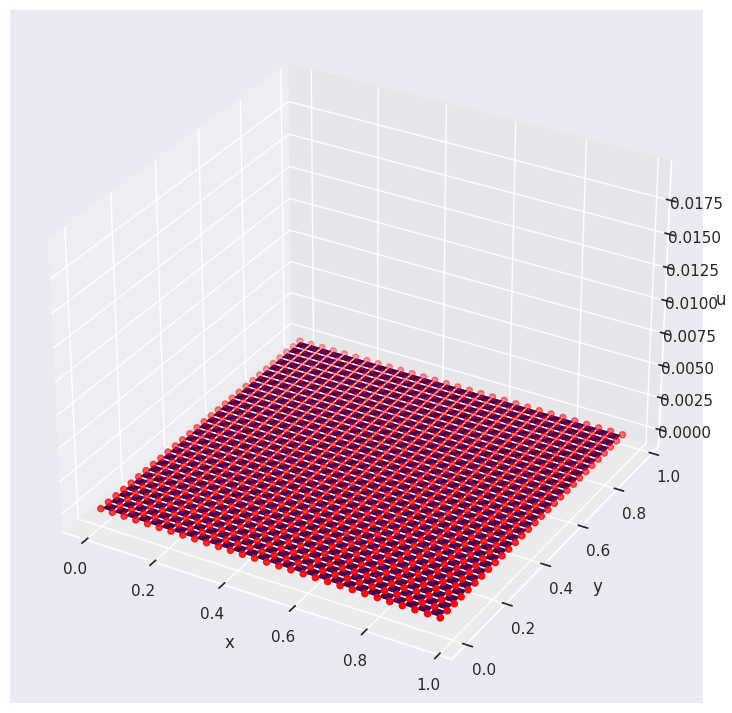

<Figure size 1000x1000 with 0 Axes>

In [7]:
create_gif_solution(20)

In [8]:
from matplotlib import cm
from tqdm import tqdm
from matplotlib.animation import ArtistAnimation

sns.set_theme(style="darkgrid")

def create_gif_error(interval):

    fig = plt.figure()
    plt.figure(figsize=(10, 10))

    ax = fig.add_subplot(projection="3d")
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('u')

    x, y = i_y[:29], i_y[:29]
    d_x, d_y = np.meshgrid(x, y)
    frames = []
    for i in tqdm(range(1, 900)):
        frames.append([ax.plot_surface(d_x, d_y, num_ans[(i - 1) * 841:i * 841].reshape((29, 29)) - anal_ans[(i - 1) * 841:i * 841].reshape((29, 29)), cmap='viridis', label="Ошибка при решении")])

        
    animation = ArtistAnimation(
    fig,                # фигура, где отображается анимация
    frames,              # кадры
    interval=interval,        # задержка между кадрами в мс
    blit=True,          # использовать ли двойную буферизацию
    repeat=True)       # зацикливать ли анимацию
    animation.save('error.gif')

  0%|          | 0/899 [00:00<?, ?it/s]

100%|██████████| 899/899 [00:02<00:00, 325.51it/s]
MovieWriter ffmpeg unavailable; using Pillow instead.


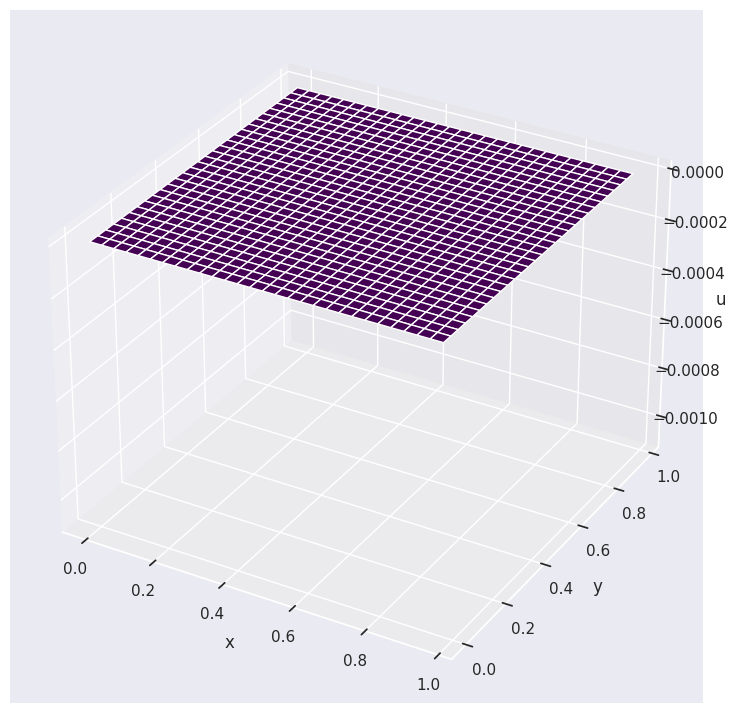

<Figure size 1000x1000 with 0 Axes>

In [9]:
create_gif_error(20)

In [13]:
from matplotlib import cm
from tqdm import tqdm
from matplotlib.animation import ArtistAnimation

sns.set_theme(style="darkgrid")

def create_gif_solution(interval):

    fig = plt.figure()
    plt.figure(figsize=(10, 10))

    ax = fig.add_subplot(projection="3d")
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('u')

    x, y = i_y[:29], i_y[:29]
    d_x, d_y = np.meshgrid(x, y)
    frames = []
    for i in tqdm(range(1, 900)):
        frames.append([ax.plot_surface(d_x, d_y, num_ans[(i - 1) * 841:i * 841].reshape((29, 29)), cmap='viridis', label="Аналитическое решение")])
        
    animation = ArtistAnimation(
    fig,                # фигура, где отображается анимация
    frames,              # кадры
    interval=interval,        # задержка между кадрами в мс
    blit=True,          # использовать ли двойную буферизацию
    repeat=True)       # зацикливать ли анимацию
    animation.save('numerical.gif')

100%|██████████| 899/899 [00:02<00:00, 330.85it/s]
MovieWriter ffmpeg unavailable; using Pillow instead.


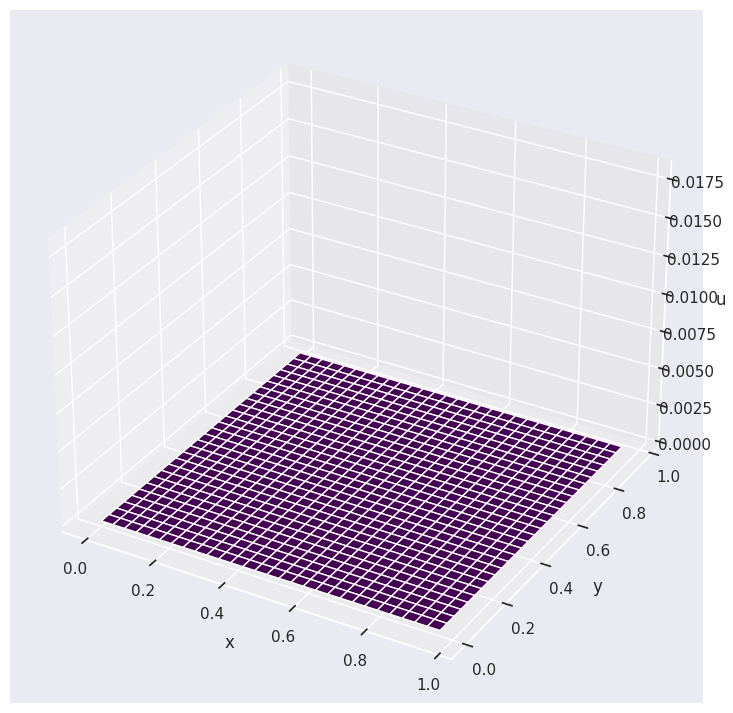

<Figure size 1000x1000 with 0 Axes>

In [14]:
create_gif_solution(20)